### Credits for the dataset
Book-Crossing Analysis dataset is Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.


In [1]:
!wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2020-09-19 23:12:49--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip’

BX-CSV-Dump.zip     100%[===================>]  24.88M  2.63MB/s    in 9.4s    

2020-09-19 23:12:59 (2.65 MB/s) - ‘BX-CSV-Dump.zip’ saved [26085508/26085508]



In [5]:
!ls

BX-Book-Ratings.csv  BX-CSV-Dump.zip  books-review-biases.ipynb
BX-Books.csv	     BX-Users.csv


In [1]:
!unzip BX-CSV-Dump.zip


Archive:  BX-CSV-Dump.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
!ls

BX-Book-Ratings.csv  BX-CSV-Dump.zip  Untitled.ipynb
BX-Books.csv	     BX-Users.csv


In [6]:
import pandas as pd

In [93]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)


In [94]:
users.shape

(278859, 3)

In [106]:
users.nunique()

user_id     278858
location     57339
age            165
dtype: int64

In [95]:
#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('BX-Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)


In [96]:
#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

In [97]:
users.head(5)

,user_id,location,age
0,User-ID,Location,Age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17


In [98]:
items.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [99]:
ratings.head(5)

,user_id,isbn,rating
0,User-ID,ISBN,Book-Rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3


In [117]:
# dropping the 1st column

users = users.drop(users.index[0])
items = items.drop(items.index[0])
ratings = ratings.drop(ratings.index[0])


In [118]:
users.shape

(278857, 3)

In [119]:
users.nunique()

user_id     278857
location     57339
age            165
dtype: int64

In [120]:
df = pd.merge(df, items, on='isbn')
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [121]:
users.shape

(278857, 3)

In [122]:
df.shape

(1031174, 12)

In [123]:
df.nunique()

user_id                 92106
location                22480
age                       141
isbn                   270169
rating                     11
book_title             241090
book_author            101607
year_of_publication       137
publisher               16746
img_s                  269860
img_m                  269860
img_l                  269857
dtype: int64

In [124]:
df = df.dropna()

In [125]:
df.describe()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,753324,753324,753324,753324,753324,753324,753324,753324,753324,753324,753324,753324
unique,53887,16156,141,229010,11,205185,87251,124,14513,228791,228791,228791
top,198711,"toronto, ontario, canada",33,0971880107,0,Wild Animus,Stephen King,2002,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
freq,6456,12147,32864,2141,483698,2141,7664,65903,24707,2141,2141,2141


In [126]:
df.shape

(753324, 12)

In [127]:
df.nunique()

user_id                 53887
location                16156
age                       141
isbn                   229010
rating                     11
book_title             205185
book_author             87251
year_of_publication       124
publisher               14513
img_s                  228791
img_m                  228791
img_l                  228791
dtype: int64

In [128]:
df['age'] = df['age'].astype(int)
df['user_id'] = df['user_id'].astype(int)


In [129]:
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

In [132]:
#keep first duplicate value
df_unique_id = df.drop_duplicates(subset=['user_id'])

In [133]:
df_unique_id.head(10)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,city,state,country
1,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
4,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
5,85526,"victoria, british columbia, canada",36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,victoria,british columbia,canada
6,96054,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
9,177458,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
12,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,halifax,nova scotia,canada
13,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,fredericton,new brunswick,canada
15,2954,"wichita, kansas, usa",71,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,wichita,kansas,usa
16,152827,"ottawa, ontario, canada",40,0060973129,7,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,ottawa,ontario,canada
18,35704,"kansas city, missouri, usa",53,0374157065,6,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,kansas city,missouri,usa


In [134]:
df_unique_id.shape

(53887, 15)

In [139]:
# Count number of records by category = country
df_unique_id['country'].value_counts(20)


usa               0.602308
canada            0.086077
germany           0.065420
united kingdom    0.055944
spain             0.041257
                    ...   
bahrain           0.000019
ghana             0.000019
puerto rico       0.000019
far away...       0.000019
guinea-bissau     0.000019
Name: country, Length: 305, dtype: float64

### Note this initial dataset has multiple records of same USER ID as some users have reviewed more than 1 book. 
### Total unique users count is 53887
### Country breakdown of these users
#### USA - 60%
#### Canada - 8.6%
#### Germany - 6.5%
#### UK - 5.6%
#### Spain - 4.1%


In [131]:
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,city,state,country
1,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
4,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
5,85526,"victoria, british columbia, canada",36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,victoria,british columbia,canada
6,96054,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
9,177458,"ottawa, ontario, canada",29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada


(553265, 15)

(65408, 15)

In [38]:
df.groupby('country').count()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,city,state
country,,,,,,,,,,,,,,
",",43,43,43,43,43,43,43,43,43,43,43,43,43,43
"\""n/a\""""",2,2,2,2,2,2,2,2,2,2,2,2,2,2
"aberdeenshire, united kingdom",7,7,7,7,7,7,7,7,7,7,7,7,7,7
afghanistan,3,3,3,3,3,3,3,3,3,3,3,3,3,3
alachua,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"yu-song, guam-dong, 626-1, 302, south korea",1,1,1,1,1,1,1,1,1,1,1,1,1,1
yugoslavia,5,5,5,5,5,5,5,5,5,5,5,5,5,5
zambia,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
grouped = df.groupby('country').sum().reset_index()
grouped.sort_values('country', ascending=False)

,country,user_id,age
304,"álava, spain",23325,17
303,zimbabwe,469643,452
302,zambia,75812,55
301,yugoslavia,905785,112
300,"yu-song, guam-dong, 626-1, 302, south korea",194260,23
...,...,...,...
4,alachua,326568,180
3,afghanistan,426179,170
2,"aberdeenshire, united kingdom",1307327,350
1,"\""n/a\""""",510798,108


In [32]:
df.shape

(753325, 15)

# Biases due to reviewer's country of origin

## World population breakdown % according to Wikipedia


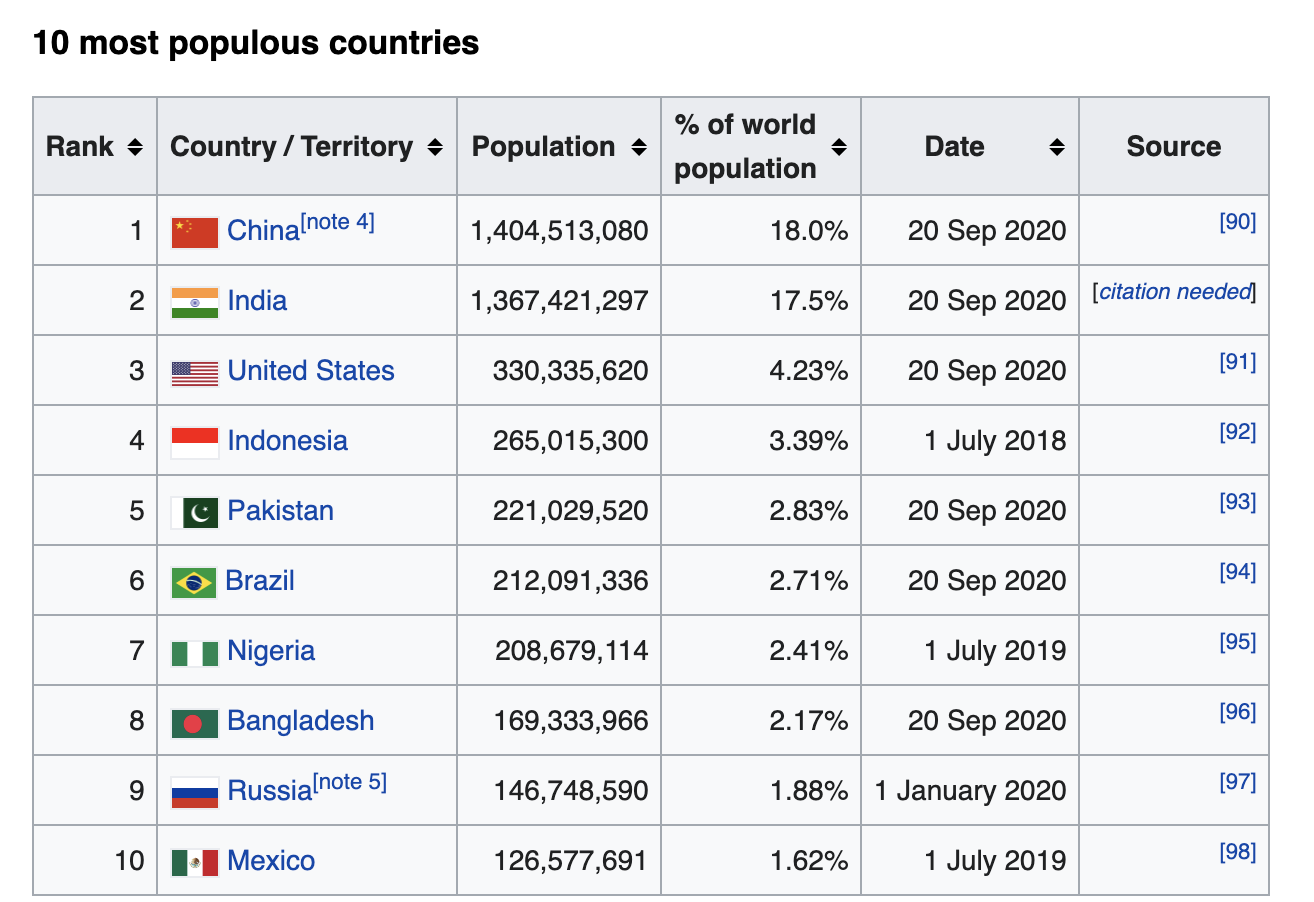



In [142]:
# Count number of unique 
#df['user_id'].unique()

In [76]:
df.groupby("user_id")["user_id"].count()

user_id
2          1
10         1
19         1
20         1
36         1
          ..
278844     2
278846     1
278849     4
278851    23
278852     1
Name: user_id, Length: 53888, dtype: int64

In [77]:

df.groupby(by='user_id').size()

user_id
2          1
10         1
19         1
20         1
36         1
          ..
278844     2
278846     1
278849     4
278851    23
278852     1
Length: 53888, dtype: int64

In [78]:
df.user_id.nunique()

53888

In [140]:
# Count number of records by category = country
#df['country'].value_counts()

In [141]:
# Top 10 country reviwers in the book review data
#df['country'].value_counts(10)

## According to the Book Reviewer data, 60% of the reviewers are from the US, followed by 
## Canada - 8.6%
## Germany - 6.5%
## UK - 5.6%
## Spain - 4.1%¶


# Insight #1 - Reviewer country origin will have a significant impact on the review for certain topics or genres that are typically based on cultural, religious and political biases. For example, perceptions of western (country) readers on easter (country) philosophies, opinions about communism, certain religions, alternative medicine, etc. Reviewers from India and China are NOT even in the top 10 countries in the book reviewer database

#### According to NOP, India reads most in a week(11 hours per week) compared to any other country, followed by Thailand and China. 

https://examinedexistence.com/which-country-reads-the-most/


# Biases due to reviewer's Age Bracket

In [45]:
# Count number of records by category = age
df['age'].value_counts()

33     32864
29     30648
30     27202
32     26492
36     26097
       ...  
157        1
133        1
118        1
123        1
147        1
Name: age, Length: 141, dtype: int64

In [57]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']


In [59]:
df['age_bins']=pd.cut(x=df['age'], bins=bins, labels=labels)


In [60]:
df['age_bins']

0            NaN
2          40-49
5          18-29
6          30-39
7          18-29
           ...  
1031170    30-39
1031171    30-39
1031172    30-39
1031173    30-39
1031174    30-39
Name: age_bins, Length: 753325, dtype: category
Categories (6, object): [18-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70+]

In [61]:
df['age_bins'].unique()

[NaN, 40-49, 18-29, 30-39, 50-59, 70+, 60-69]
Categories (6, object): [18-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70+]

In [62]:
df['age_bins'].value_counts()

30-39    232922
18-29    221236
40-49    146902
50-59     87351
60-69     27182
70+        5530
Name: age_bins, dtype: int64

### 31% of reviwers of age group 30 to 39 
### 29.5% of reviewers of age group 18 to 29
### 19.5% of reviwers of age group 40 to 49
### 11.5% of reviewers of age group 50 to 59
### 3.6% of reviewers of age group 60 to 69
### 0.73% of reviwers of age group 70+


# World population breakdown by age bracket

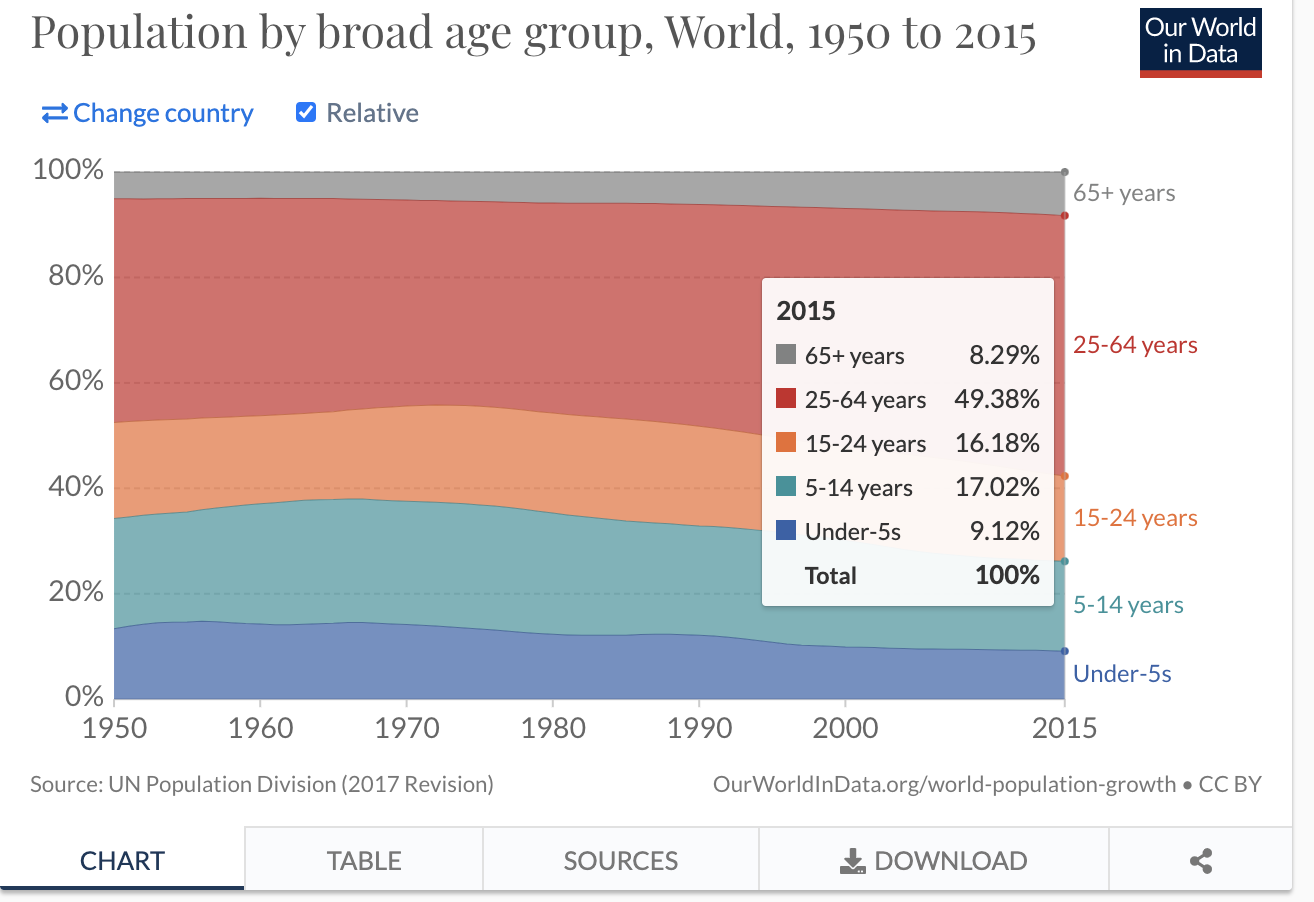

In [65]:
# Using the above breakdown, what is the reviewer age group breakdown
bins = [5, 15, 25, 65, 120]
labels = ['5-14', '15-24', '25-64', '65+']


In [66]:
df['age_bins']=pd.cut(x=df['age'], bins=bins, labels=labels)

In [67]:
df['age_bins'].value_counts()

25-64    616047
15-24    110359
65+       12045
5-14      11861
Name: age_bins, dtype: int64

### With the new age bracket, the % are
#### 5 to 14 - 1.6%
#### 15 to 24 - 14.6%
#### 25 to 64 - 82%
#### 65+ - 1.6%


# Insight #2 - 82% of the reviwers are in the age bracket of 25 to 64 where as less than 50% of world's population is in that age bracket. While only 1.6% of the reviewers are in the age barcket of 65+, 8.3% of the world's population is in this age bracket. So, these differences age bracket distributions could lead to biases against certain age brackets, if models use this dataset. 

In [75]:
# Follow up further on this article - https://bookriot.com/book-and-reading-statistics/